In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
df = pd.read_csv("titanic.csv")
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Data Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [6]:
# Handle missing values safely
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

print("✅ Missing values handled successfully.")



✅ Missing values handled successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_13352\258756471.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13352\258756471.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [7]:
df.describe(include='all')


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


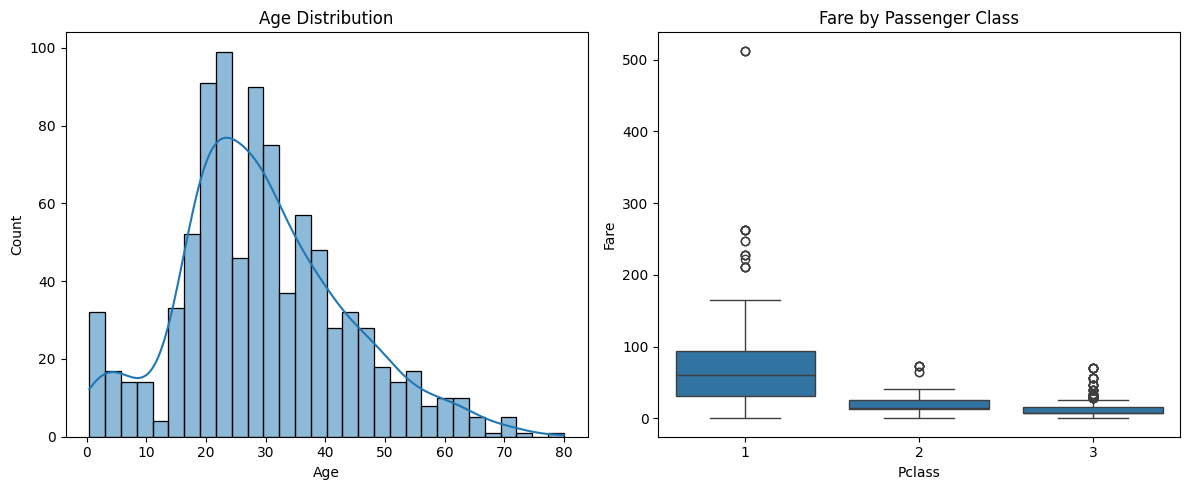

In [8]:
# Numerical features
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.boxplot(x='Pclass', y='Fare', data=df, ax=ax[1])
ax[1].set_title('Fare by Passenger Class')

plt.tight_layout()
plt.show()


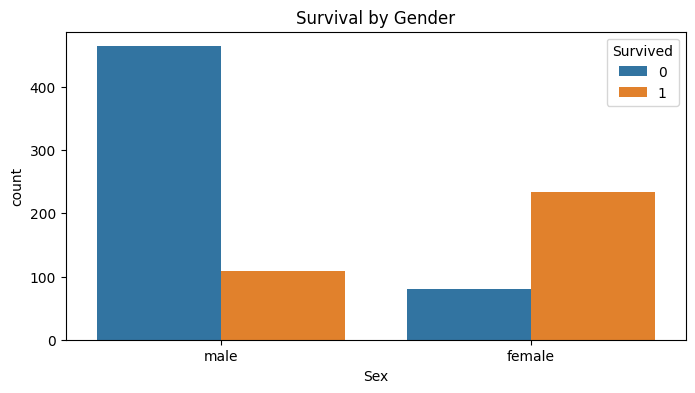

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


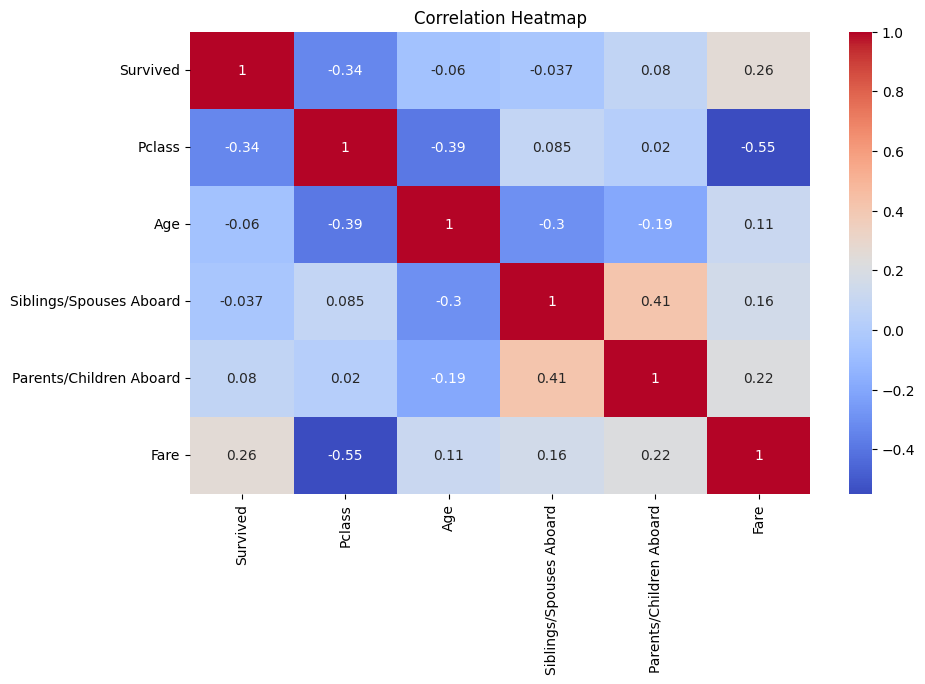

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100


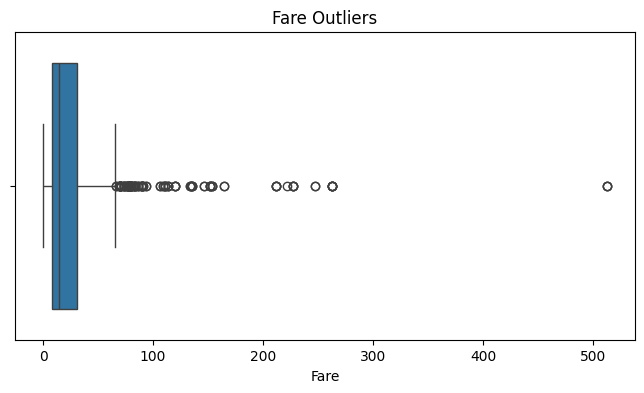

Found 20 fare outliers


In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()

z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]
print(f"Found {len(outliers)} fare outliers")


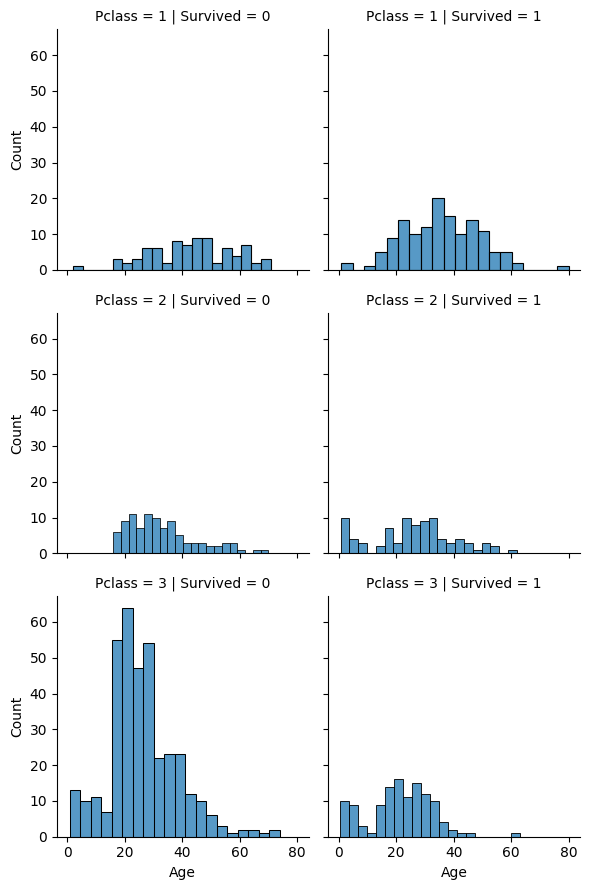

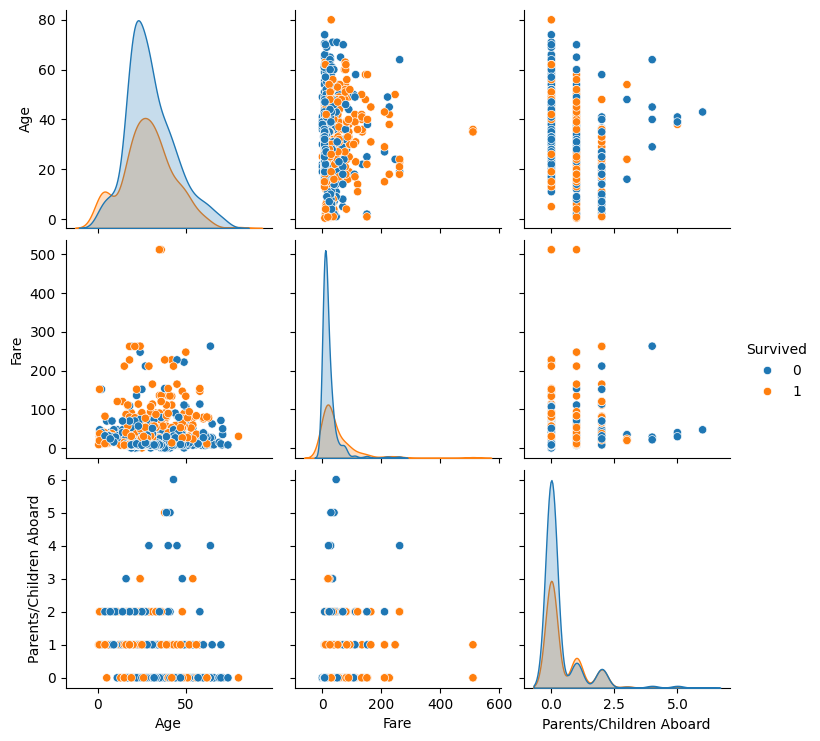

In [ ]:

g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)
plt.show()


sns.pairplot(df[['Age', 'Fare', 'Parents/Children Aboard', 'Survived']], hue='Survived')
plt.show()


In [13]:
print("🔹 Key Insights:")
print("• Younger passengers (especially under 10) had higher survival chances.")
print("• 1st-class passengers paid significantly higher fares and had higher survival rates.")
print("• Females had a much higher survival rate than males.")
print("• Several high-value fares are legitimate outliers (luxury suites).")
print("• Correlation between Fare and Survival is positive, around 0.25.")


🔹 Key Insights:
• Younger passengers (especially under 10) had higher survival chances.
• 1st-class passengers paid significantly higher fares and had higher survival rates.
• Females had a much higher survival rate than males.
• Several high-value fares are legitimate outliers (luxury suites).
• Correlation between Fare and Survival is positive, around 0.25.
